In [106]:
#Import numerical libraries
import pandas as pd
import numpy as np

#Import graphical plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import Linear Regression Machine Learning Libraries
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [107]:
data = pd.read_csv(r"C:\Users\91700\Desktop\Files\Full stack Data Science and AI Course all Material\11th- l1, l2\TASK-22_LASSO,RIDGE\car-mpg.csv")
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [108]:
#Drop car name
#Replace origin into 1,2,3.. dont forget get_dummies
#Replace ? with nan
#Replace all nan with median

#Drop car name
#Replace origin into 1,2,3.. dont forget get_dummies
#Replace ? with nan
#Replace all nan with median
data = data.drop(['car_name'], axis = 1)
data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
data = pd.get_dummies(data, columns=['origin'])
data = data.replace('?', np.nan)

# Convert numeric strings to actual numbers
data = data.apply(pd.to_numeric, errors='coerce')

# Fill missing values with column medians
data = data.apply(lambda x: x.fillna(x.median()), axis=0)

In [109]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,0,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,0,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,0,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,0,True,False,False


data=data.apply(pd.to_numeric, errors='ignore')

numeric_cols= data.select_dtypes(include=[np.number]).columns
data[numeric_cols]=data[numeric_cols].apply(lambda x:x.fillna(x.median()))

In [110]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,0,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,0,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,0,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,0,True,False,False


Model Building

In [120]:
X = data.drop(['mpg'], axis = 1) # independent variable
y = data[['mpg']] #dependent variable

In [121]:
#Scaling the data

X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns = X.columns) #converting scaled data into dataframe

y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns = y.columns) #ideally train, test data should be in columns

In [122]:
X_s

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.941412,-1.292726,-0.497643,2.164651
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.497643,-0.461968
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.497643,-0.461968


In [114]:
y_s

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543
...,...
393,0.446497
394,2.624265
395,1.087017
396,0.574601


In [123]:
#Split into train, test set

X_train, X_test, y_train,y_test = train_test_split(X_s, y_s, test_size = 0.30, random_state = 1)
X_train.shape

(278, 10)

Simple Linear Model

In [125]:
#Fit simple linear model and find coefficients
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print('The intercept is {}'.format(intercept))

The coefficient for cyl is 0.3210223856916108
The coefficient for disp is 0.3248343091848394
The coefficient for hp is -0.2291695005943759
The coefficient for wt is -0.7112101905072299
The coefficient for acc is 0.014713682764191435
The coefficient for yr is 0.3755811949510741
The coefficient for car_type is 0.38147694842331
The coefficient for origin_america is -0.0747224754758417
The coefficient for origin_asia is 0.04451525203567813
The coefficient for origin_europe is 0.04834854953945371
The intercept is 0.019284116103639715


Regularized Ridge regression

In [127]:
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

ridge_model = Ridge(alpha = 0.3)
ridge_model.fit(X_train, y_train)

print('Ridge model coef: {}'.format(ridge_model.coef_))
#As the data has 10 columns hence 10 coefficients appear here   

Ridge model coef: [[ 0.31649043  0.31320707 -0.22876025 -0.70109447  0.01295851  0.37447352
   0.37725608 -0.07423624  0.04441039  0.04784031]]


Regularized Lasso regression

In [128]:
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)

print('Lasso model coef: {}'.format(lasso_model.coef_))
#As the data has 10 columns hence 10 coefficients appear here   

Lasso model coef: [-0.         -0.         -0.01690287 -0.51890013  0.          0.28138241
  0.1278489  -0.01642647  0.          0.        ]


Score Comparison

In [129]:
#Model score - r^2 or coeff of determinant
#r^2 = 1-(RSS/TSS) = Regression error/TSS 


#Simple Linear Model
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

print('*************************')
#Ridge
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

print('*************************')
#Lasso
print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.8343770256960538
0.8513421387780067
*************************
0.8343617931312617
0.8518882171608501
*************************
0.7938010766228453
0.8375229615977084


Model Parameter Tuning

In [130]:
data_train_test = pd.concat([X_train, y_train], axis =1)
data_train_test.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
350,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,0.941412,0.773559,-0.497643,-0.461968,1.432898
59,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.941412,-1.292726,-0.497643,2.164651,-0.065919
120,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.941412,-1.292726,-0.497643,2.164651,-0.578335
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
349,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.356035


In [131]:
import statsmodels.formula.api as smf
ols1 = smf.ols(formula = 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia', data = data_train_test).fit()
ols1.params

Intercept         0.019284
cyl               0.321022
disp              0.324834
hp               -0.229170
wt               -0.711210
acc               0.014714
yr                0.375581
car_type          0.381477
origin_america   -0.074722
origin_europe     0.048349
origin_asia       0.044515
dtype: float64

In [132]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           3.12e-99
Time:                        21:35:06   Log-Likelihood:                -146.89
No. Observations:                 278   AIC:                             313.8
Df Residuals:                     268   BIC:                             350.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0193      0.025      0.

In [133]:
#Lets check Sum of Squared Errors (SSE) by predicting value of y for test cases and subtracting from the actual y for the test cases
mse  = np.mean((regression_model.predict(X_test)-y_test)**2)

# root of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
rmse = math.sqrt(mse)
print('Root Mean Squared Error: {}'.format(rmse))

Root Mean Squared Error: 0.3776693425408783


So there is an avg. mpg difference of 0.37 from real mpg

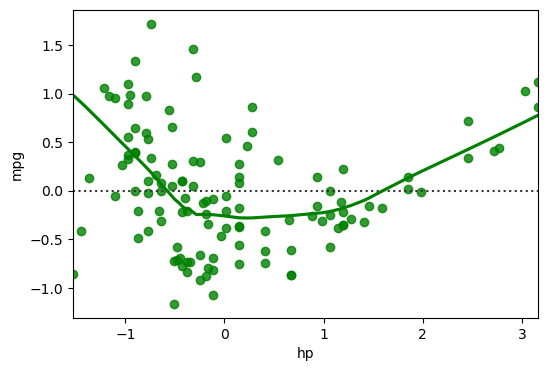

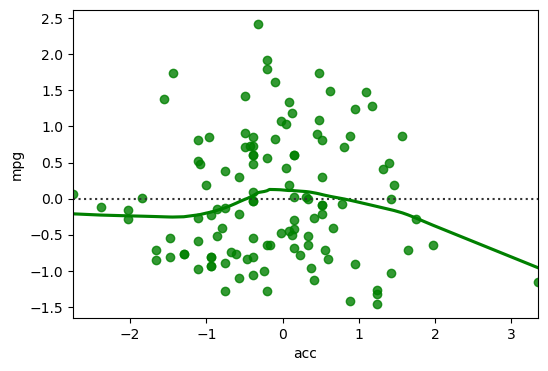

In [137]:
# Is OLS a good model ? Lets check the residuals for some of these predictor.

fig = plt.figure(figsize=(6,4))
sns.residplot(x= X_test['hp'], y= y_test['mpg'], color='green', lowess=True )


fig = plt.figure(figsize=(6,4))
sns.residplot(x= X_test['acc'], y= y_test['mpg'], color='green', lowess=True )
plt.show()

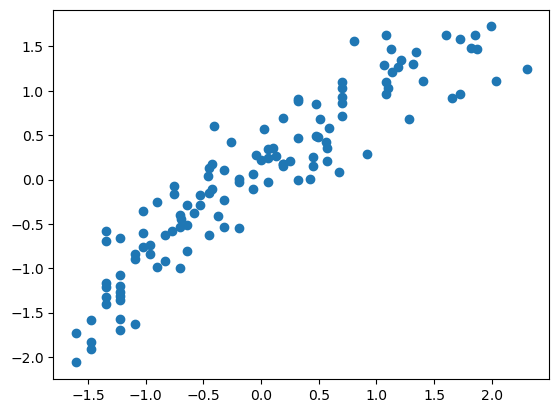

In [136]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500
plt.scatter(y_test['mpg'], y_pred)
plt.show()